In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection


In [21]:
dt = pd.read_csv("bank.csv")
dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [22]:
dt.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

no     5873
yes    5289
Name: deposit, dtype: int64
['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']


<AxesSubplot:xlabel='deposit', ylabel='count'>

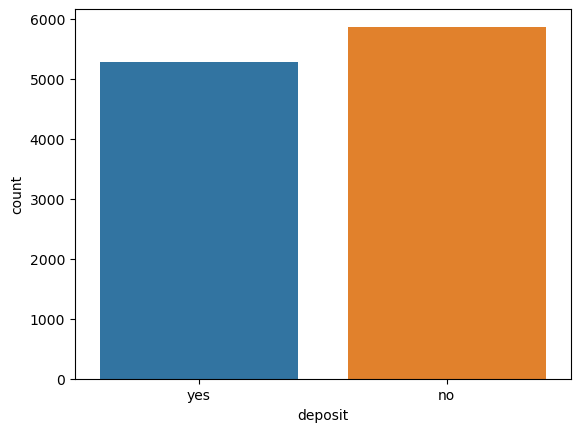

In [44]:
print(dt.deposit.value_counts())
lst = []
for i in range(len(dt["job"])):
    if dt["job"][i] not in lst:
        lst = lst + [dt["job"][i]]

print(lst)
sns.countplot(x="deposit", data=dt)

yes    5289
no     5289
Name: deposit, dtype: int64


<AxesSubplot:xlabel='deposit', ylabel='count'>

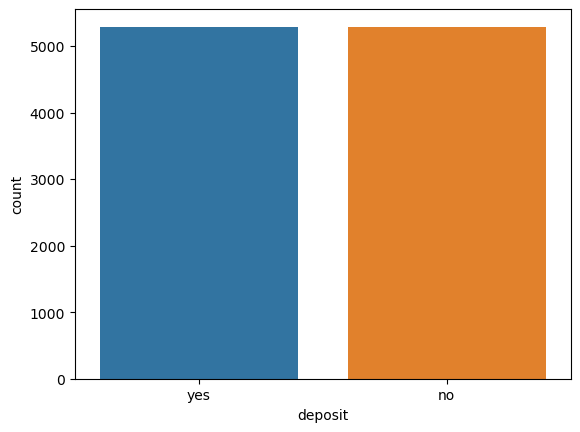

In [24]:

deposit = dt.loc[dt['deposit'] == "yes"]
no_deposit = dt.loc[dt['deposit'] == "no"][:5289]
normal_distributed_dt = pd.concat([no_deposit, deposit])
new_dt = normal_distributed_dt.sample(frac=1, random_state=42)
new_dt.head()
print(new_dt.deposit.value_counts())
sns.countplot(x = "deposit", data = new_dt)


In [58]:
new_dt.describe()
''' Deposit
0 - no
1 - yes'''

''' Job
0 - admin
1 - management
2 - technician
3 - blue-collar
4 - services
5 - retired
6 - self-employed
7 - unemployed
8 - housemaid
9 - entrepreneur
10 - student
11 - unknown'''

''' Education
0 - unknown
1 - primary
2 - secondary
3 - tertiary'''

''' Marital
0 - married
1 - single
2 - divorced'''

''' Default
0 - no
1 - yes'''

''' Housing
0 - no
1 - yes'''


''' Loan
0 - no
1 - yes'''

''' Job
0 - jan
1 - feb
2 - march
3 - apr
4 - may
5 - jun
6 - jul
7 - aug
8 - sep
9 - oct
10 - nov
11 - dec'''

''' Poutcomme
0 - unknown
1 - failure
2 - success
3 - other'''

numeric_dt = new_dt
numeric_dt["deposit"] = numeric_dt["deposit"].replace(["yes", "no"], [1, 0])
numeric_dt["job"] = numeric_dt["job"].replace(["admin.", "management", "technician", "blue-collar"
, "services", "retired", "self-employed", "unemployed", "housemaid", "entrepreneur", "student", "unknown"], 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
numeric_dt["education"] = numeric_dt["education"].replace(["unknown", "primary", "secondary", "tertiary"],
[0, 1, 2, 3])
numeric_dt["marital"] = numeric_dt["marital"].replace(["married", "single", "divorced"], [0, 1, 2])
numeric_dt["default"] = numeric_dt["default"].replace(["yes", "no"], [1, 0])
numeric_dt["housing"] = numeric_dt["housing"].replace(["yes", "no"], [1, 0])
numeric_dt["loan"] = numeric_dt["loan"].replace(["yes", "no"], [1, 0])
numeric_dt["month"] = numeric_dt["month"].replace(["jan", "feb", "mar", "apr"
, "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
numeric_dt["poutcome"] = numeric_dt["poutcome"].replace(["unknown", "failure", "success", "other"], [0, 1, 2, 3])
#numeric_dt.drop("contact",axis=1,inplace=True)
numeric_dt



,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
68,41,0,0,1,0,-306,1,0,15,4,500,1,-1,0,0,1
1306,30,0,1,2,0,523,0,1,3,2,83,1,-1,0,0,1
4316,58,1,0,3,0,473,0,0,18,1,1109,1,262,1,2,1
2858,61,1,0,3,0,477,1,0,29,9,377,1,520,1,3,1
2491,36,1,1,3,0,3850,1,0,12,7,239,2,100,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,43,0,0,3,0,189,1,0,14,6,1062,4,-1,0,0,1
10480,36,4,0,2,0,5024,0,0,21,4,139,1,-1,0,0,0
101,35,3,0,1,0,102,1,0,20,4,1334,1,-1,0,0,1
6149,29,3,0,2,0,0,0,0,10,6,45,1,-1,0,0,0


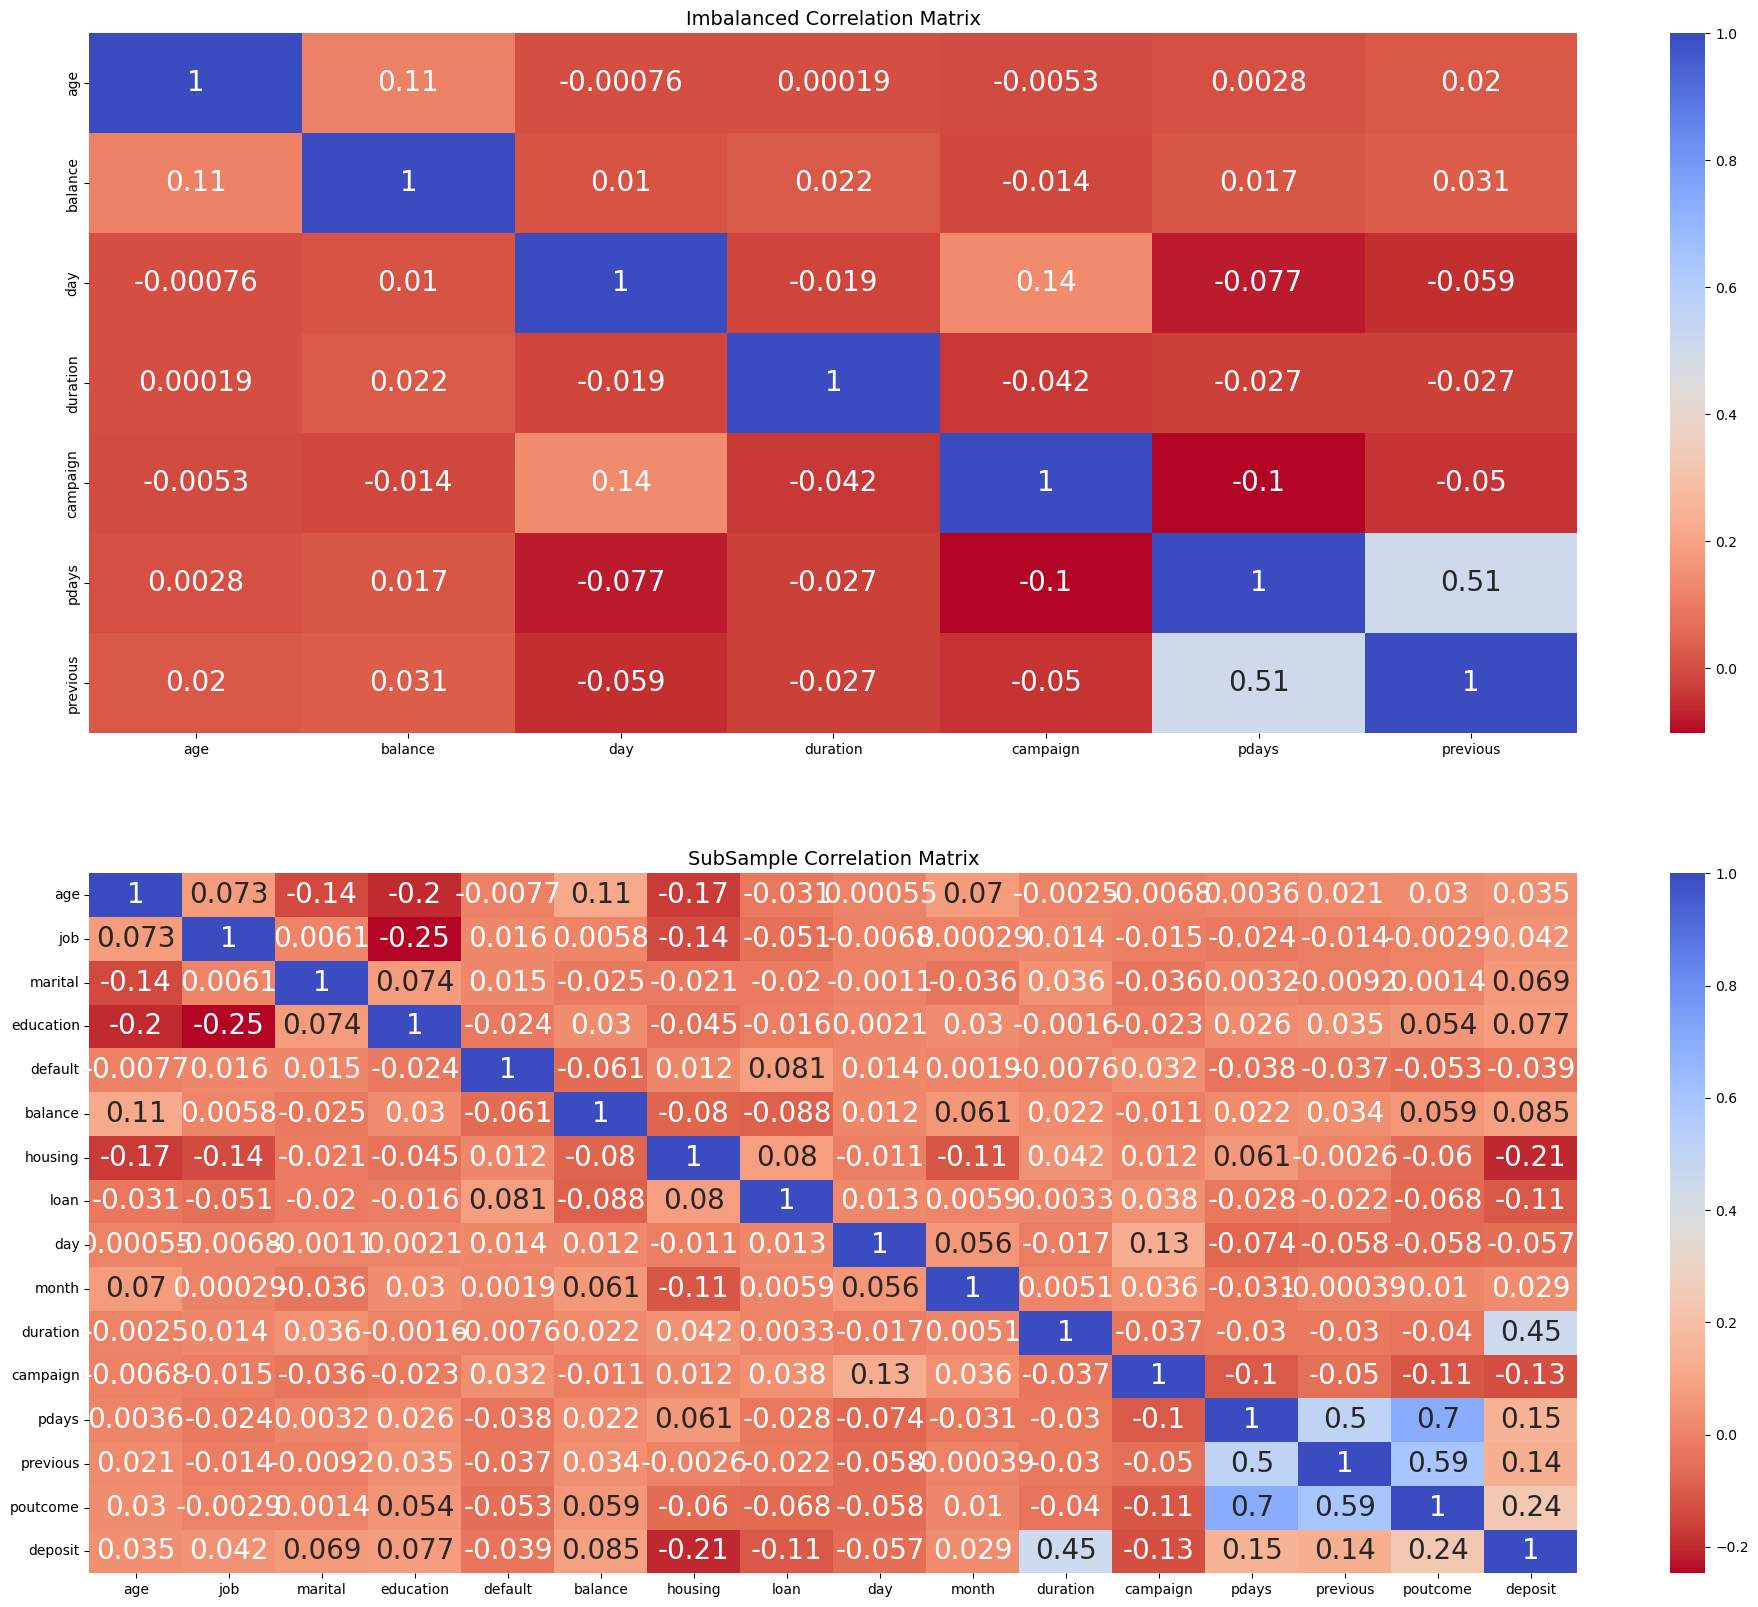

In [61]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = dt.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot=True,annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sub_sample_corr = numeric_dt.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r',annot=True, annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

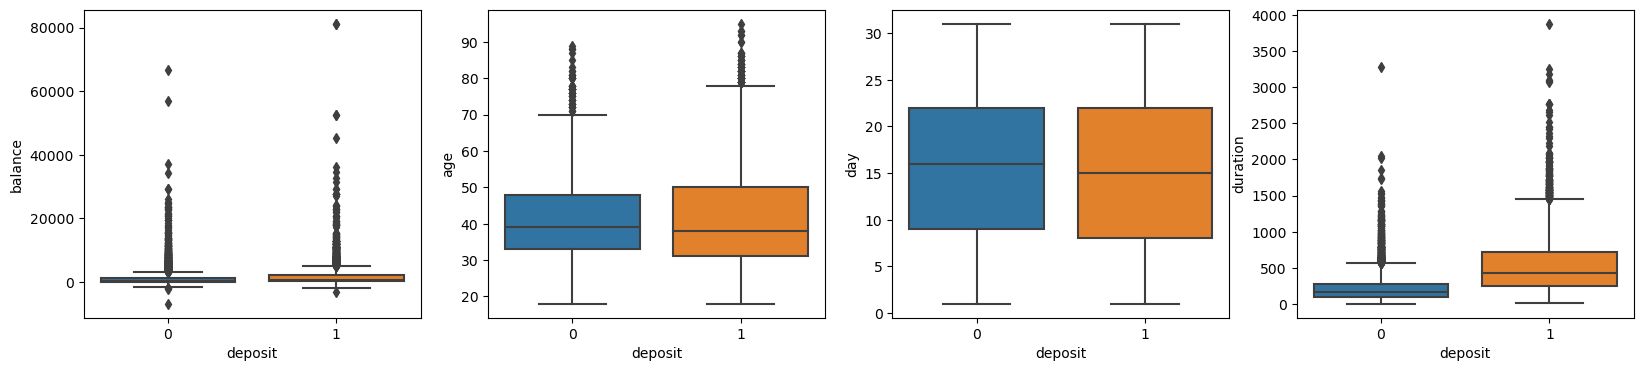

In [27]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="deposit", y="balance", data=new_dt, ax=axes[0])

sns.boxplot(x="deposit", y="age", data=new_dt, ax=axes[1])

sns.boxplot(x="deposit", y="day", data=new_dt, ax=axes[2])

sns.boxplot(x="deposit", y="duration", data=new_dt, ax=axes[3])




plt.show()

<AxesSubplot:xlabel='deposit', ylabel='pdays'>

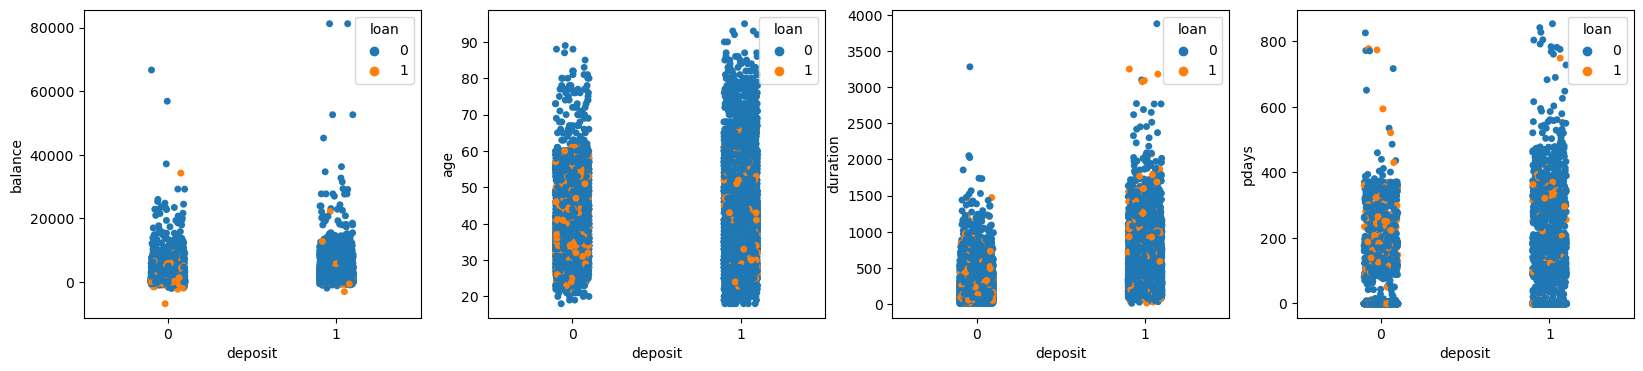

In [28]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.stripplot(y="balance",x="deposit", data = numeric_dt, ax = axes[0], hue = "loan")

sns.stripplot(y="age",x="deposit", data = numeric_dt, ax = axes[1], hue = "loan")

sns.stripplot(y="duration",x="deposit", data = numeric_dt, ax = axes[2], hue = "loan")

sns.stripplot(y="pdays",x="deposit", data = numeric_dt, ax = axes[3], hue = "loan")



In [83]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(numeric_dt, numeric_dt['deposit'], test_size=0.2, random_state=0 )

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

regressor = RandomForestClassifier()
_ = regressor.fit(X_train, Y_train)
print(regressor.score(X_test, Y_test))

n = 7
rfe = RFE(regressor, n_features_to_select=n)
rfe.fit(X_train, Y_train)

print(rfe.ranking_)
print(rfe.support_)
new_short_dt = X_train.loc[:,rfe.support_]
print(new_short_dt)


1.0
[ 3  5  8  7 10  1  1  9  4  1  1  6  1  2  1  1]
[False False False False False  True  True False False  True  True False
  True False  True  True]
       balance  housing  month  duration  pdays  poutcome  deposit
8991        54        0      7       199     -1         0        0
3322       158        0      2       212    181         2        1
10548     5632        1      6       380     -1         0        0
5570       471        1      4       161     -1         0        0
2059       239        1      4       666    360         2        1
...        ...      ...    ...       ...    ...       ...      ...
6095      3876        0     10        54     -1         0        0
7255      1406        1      6       178     -1         0        0
1216       270        0      1       123     -1         0        1
2728      1464        0      9       194     94         2        1
10156        0        0      7       277     -1         0        0

[8462 rows x 7 columns]


In [85]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(new_short_dt, new_short_dt['deposit'], test_size=0.2, random_state=0 )

1.0
